## Laboratorio 01 - Programación Lineal

### Ejercicio 02

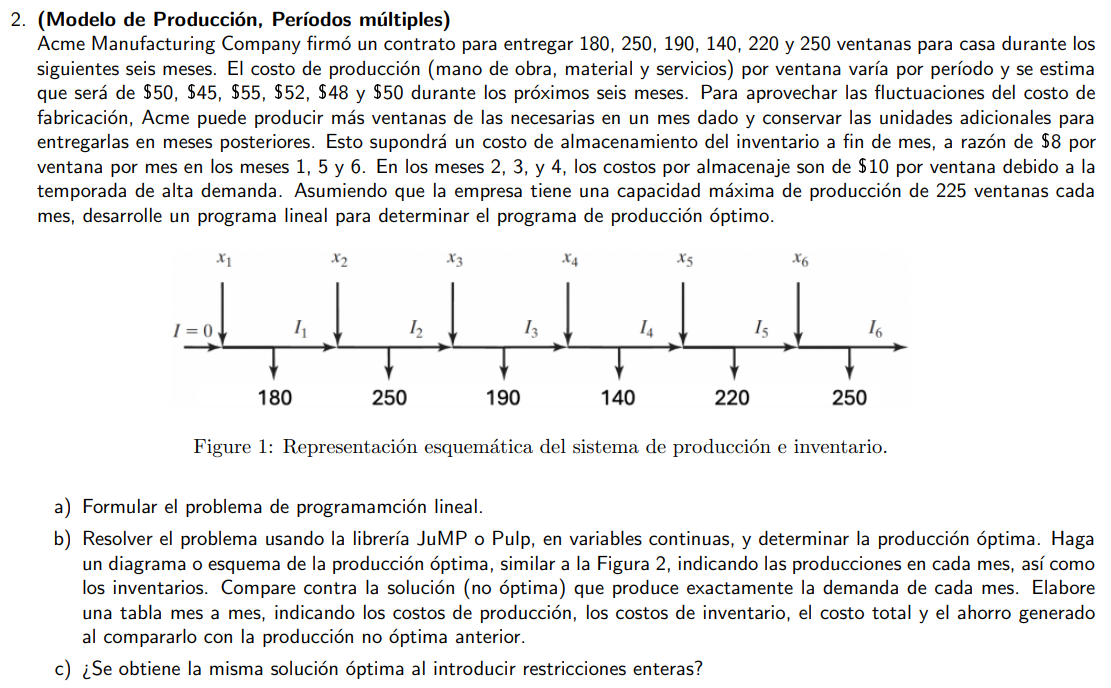

<small>

### Variables 
- xt = número de ventanas producidas en el mes t, para t = 1,...,6
- It = inventario de ventanas al final del mes t, para t 1,...,6
- I0 = inventario inicial

### Función objetivo
$$Z = 50x1 + 45x2 + 55x3 + 52x4 + 48x5 + 50x6 + 8Inv1 + 10Inv2 + 10Inv3 + 10Inv4 + 8Inv5 + 8Inv6$$

### Restricciones
1. Balance demanda-inventario
$$Inv1 = x1 - 180$$
$$Inv2 = Inv1 + x2 - 250$$
$$Inv3 = Inv2 + x3 -190$$
$$Inv4 = Inv3 + x4 -140$$
$$Inv5 = Inv4 + x5 -220$$
$$Inv6 = Inv5 + x6 -250$$

2. Capaciad de producción
$$xt <= 225, t = 1,...,6$$

3. No negatividad
$$xt >= 0, It >= 0, t = 1,...,6$$
</small>

In [36]:
using JuMP
using HiGHS
using Ipopt
using Optimization
using DataFrames, PrettyTables

In [37]:
model = Model()

A JuMP Model
├ solver: none
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

In [38]:
@variable(model, x[1:6] >= 0, Int)  
@variable(model, Inv[1:6] >= 0, Int)  

6-element Vector{VariableRef}:
 Inv[1]
 Inv[2]
 Inv[3]
 Inv[4]
 Inv[5]
 Inv[6]

In [39]:
D = [180, 250, 190, 140, 220, 250]
c = [ 50,  45,  55,  52,  48,  50]
h = [  8,  10,  10,  10,   8,   8]

6-element Vector{Int64}:
  8
 10
 10
 10
  8
  8

In [40]:
@constraint(model, Inv[1] == x[1]     - D[1])
@constraint(model, Inv[2] == Inv[1] + x[2] - D[2])
@constraint(model, Inv[3] == Inv[2] + x[3] - D[3])
@constraint(model, Inv[4] == Inv[3] + x[4] - D[4])
@constraint(model, Inv[5] == Inv[4] + x[5] - D[5])
@constraint(model, Inv[6] == Inv[5] + x[6] - D[6])

-x[6] - Inv[5] + Inv[6] == -250

In [41]:
@constraint(model, x[1] <= 225)
@constraint(model, x[2] <= 225)
@constraint(model, x[3] <= 225)
@constraint(model, x[4] <= 225)
@constraint(model, x[5] <= 225)
@constraint(model, x[6] <= 225)

x[6] <= 225

In [42]:
@objective(model, Min,
    50*x[1] + 45*x[2] + 55*x[3] + 52*x[4] + 48*x[5] + 50*x[6]
  +  8*Inv[1]  + 10*Inv[2]  + 10*Inv[3]  + 10*Inv[4]  +  8*Inv[5]  +  8*Inv[6]
)

50 x[1] + 45 x[2] + 55 x[3] + 52 x[4] + 48 x[5] + 50 x[6] + 8 Inv[1] + 10 Inv[2] + 10 Inv[3] + 10 Inv[4] + 8 Inv[5] + 8 Inv[6]

In [43]:
set_optimizer(model, HiGHS.Optimizer)

In [44]:
model

A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 12
├ num_constraints: 36
│ ├ AffExpr in MOI.EqualTo{Float64}: 6
│ ├ AffExpr in MOI.LessThan{Float64}: 6
│ ├ VariableRef in MOI.GreaterThan{Float64}: 12
│ └ VariableRef in MOI.Integer: 12
└ Names registered in the model
  └ :Inv, :x

In [45]:
optimize!(model)

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
MIP  has 12 rows; 12 cols; 23 nonzeros; 12 integer variables (0 binary)
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [8e+00, 6e+01]
  Bound  [0e+00, 0e+00]
  RHS    [1e+02, 2e+02]
Presolving model
5 rows, 11 cols, 15 nonzeros  0s
3 rows, 9 cols, 11 nonzeros  0s
2 rows, 6 cols, 7 nonzeros  0s
1 rows, 3 cols, 3 nonzeros  0s
0 rows, 1 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve: Optimal

Src: B => Branching; C => Central rounding; F => Feasibility pump; J => Feasibility jump;
     H => Heuristic; L => Sub-MIP; P => Empty MIP; R => Randomized rounding; Z => ZI Round;
     I => Shifting; S => Solve LP; T => Evaluate node; U => Unbounded; X => User solution;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQ

In [46]:
println("Optimal solution:")
for i in 1:6
    println("x[$i] = ", value(x[i]), ", Inv[$i] = ", value(Inv[i]))
end
println("Objective value: ", objective_value(model))

Optimal solution:
x[1] = 205.0, Inv[1] = 25.0
x[2] = 225.0, Inv[2] = 0.0
x[3] = 190.0, Inv[3] = 0.0
x[4] = 160.0, Inv[4] = 20.0
x[5] = 225.0, Inv[5] = 25.0
x[6] = 225.0, Inv[6] = 0.0
Objective value: 61795.0


### Diagrama de producción óptima

In [47]:
println("Producción óptima x = ", value.(x))
println("Inventarios óptimos Inv = ", value.(Inv))

Producción óptima x = [205.0, 225.0, 190.0, 160.0, 225.0, 225.0]
Inventarios óptimos Inv = [25.0, 0.0, 0.0, 20.0, 25.0, 0.0]


```text
I₀ = 0  ──▶───────▶───────▶───────▶───────▶───────▶───────▶─── Tiempo
            ↑205    ↑225    ↑190    ↑160    ↑225    ↑225
            ↓180    ↓250    ↓190    ↓140    ↓220    ↓250
            I₁=25   I₂=0    I₃=0    I₄=20   I₅=25   I₆=0

### Tabla mes a mes de producción óptima

In [48]:
x_opt   = value.(x)
Inv_opt = value.(Inv)

D       = [180, 250, 190, 140, 220, 250]
c       = [50,  45,  55,  52,  48,  50]
h       = [ 8,  10,  10,  10,   8,   8]

costo_prod = c .* x_opt
costo_inv  = h .* Inv_opt
costo_tot  = costo_prod .+ costo_inv

df = DataFrame(
    Mes                 = 1:6,
    Demanda             = D,
    Producción_Óptima   = x_opt,
    Inventario_Óptimo   = Inv_opt,
    Costo_Prod_Óptimo   = costo_prod,
    Costo_Inv_Óptimo    = costo_inv,
    Costo_Total_Óptimo  = costo_tot,
    Costo_Prod_NoÓptimo = c .* D,
)
df.Costo_Ahorro = df.Costo_Prod_NoÓptimo .- df.Costo_Total_Óptimo

pretty_table(df; formatters = ft_printf("%.0f"), header_alignment = :c)


┌───────┬─────────┬───────────────────┬───────────────────┬───────────────────┬──────────────────┬────────────────────┬─────────────────────┬──────────────┐
│  Mes  │ Demanda │ Producción_Óptima │ Inventario_Óptimo │ Costo_Prod_Óptimo │ Costo_Inv_Óptimo │ Costo_Total_Óptimo │ Costo_Prod_NoÓptimo │ Costo_Ahorro │
│ Int64 │  Int64  │      Float64      │      Float64      │      Float64      │     Float64      │      Float64       │        Int64        │   Float64    │
├───────┼─────────┼───────────────────┼───────────────────┼───────────────────┼──────────────────┼────────────────────┼─────────────────────┼──────────────┤
│     1 │     180 │               205 │                25 │             10250 │              200 │              10450 │                9000 │        -1450 │
│     2 │     250 │               225 │                 0 │             10125 │                0 │              10125 │               11250 │         1125 │
│     3 │     190 │               190 │                 0 

### ¿Se obtiene la misma solución óptima al introducir restricciones enteras?

<small>

**Respuesta:**  
Sí. Al exigir que las variables de producción `x[j]` e inventario `Inv[j]` sean enteras, la solución óptima **no cambia**. A continuación se justifica y se muestran los resultados antes y después.


#### Justificación teórica

1. **Estructura de “flujo y balance”**  
   Cada restricción de inventario  
   \[
   Inv_j = Inv_{j-1} + x_j - D_j
   \]  
   es análoga a conservar el flujo de un único producto a lo largo de un “camino” de 6 nodos (meses).  

2. **Total unimodularidad**  
   La matriz de coeficientes formada por esas igualdades y las cotas \(0 \le x_j \le 225\) es _totalmente unimodular_.  
   - Las entradas son \(\{-1,0,1\}\).  
   - Cada columna tiene a lo sumo dos no-ceros, uno +1 y uno –1.  
   Por ello, la relajación lineal siempre produce vértices enteros.


#### Valores **sin** restricciones enteras (LP relaxation)

```text
Optimal solution (relajación LP):
x[1] = 205.0, Inv[1] = 25.0
x[2] = 225.0, Inv[2] =  0.0
x[3] = 190.0, Inv[3] =  0.0
x[4] = 160.0, Inv[4] = 20.0
x[5] = 225.0, Inv[5] = 25.0
x[6] = 225.0, Inv[6] =  0.0

Objective value: 61795.0
```

#### Valores **con** restricciones enteras (MIP)

```text
Optimal solution (con Int):
x[1] = 205.0, Inv[1] = 25.0
x[2] = 225.0, Inv[2] =  0.0
x[3] = 190.0, Inv[3] =  0.0
x[4] = 160.0, Inv[4] = 20.0
x[5] = 225.0, Inv[5] = 25.0
x[6] = 225.0, Inv[6] =  0.0

Objective value: 61795.0
```

</small>